<a href="https://colab.research.google.com/github/angelohafner/artificial-inteligence-classes/blob/main/tensorflow_derivative_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 TensorFlow Neural Network to Learn Derivatives

This notebook trains a neural network to approximate the derivative $d(x) = \frac{dy}{dx}$ from tables of points (x, y) and (x, d).

Each input is a pair (x, y), and the target is d(x).

In [47]:
# 📦 Install TensorFlow (if needed)
!pip install -q tensorflow

# 📚 Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 🧪 Generate Example Data
In real applications, you'd load actual tables. Here we generate data for $y = x^2$, so $d = 2x$.

In [48]:
# 🔢 Generate synthetic data
def generate_data():
    x = np.linspace(-2, 2, 100)
    y = x ** 5
    d = 5 * x  # derivative of x^2
    return x.astype(np.float32), y.astype(np.float32), d.astype(np.float32)

x_vals, y_vals, d_vals = generate_data()

# Prepare training features and labels
X_train = np.stack([x_vals, y_vals], axis=1)
y_train = d_vals.reshape(-1, 1)

## 🧠 Build the Model

In [49]:
# Create the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dropout(0.2),  # 20% of neurons will be dropped
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),  # 20% of neurons will be dropped
    tf.keras.layers.Dense(64, activation='linear'),
    tf.keras.layers.Dropout(0.2),  # 20% of neurons will be dropped
    tf.keras.layers.Dense(1)  # output = predicted derivative
])

model.compile(optimizer='adam', loss='mse')

## 🏋️‍♂️ Train the Model

In [50]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - loss: 29.3563 - val_loss: 97.1472
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 25.3781 - val_loss: 90.7099
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 24.5529 - val_loss: 85.7052
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 22.8982 - val_loss: 78.8240
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 21.2338 - val_loss: 70.3767
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 18.5799 - val_loss: 61.8193
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 16.4302 - val_loss: 52.5149
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 16.1642 - val_loss: 43.0072
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 14.8651 - val_loss: 32.9871
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 11.2661 - val_loss: 24.3150
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 10.5688 - val_loss: 17.1238
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss:

In [51]:
# # 📦 Salvar o modelo já treinado
# # (usa o formato nativo "Keras v3"; se preferir, mude para ".h5" ou "SavedModel")
# model.save(r"models/derivative_net.keras")  # path as raw string

# # 🔄 Carregar depois (sem re-treinar)
# import tensorflow as tf
# loaded_model = tf.keras.models.load_model(r"models/derivative_net.keras")

# # ✅ Usar direto
# d_pred = loaded_model.predict(np.stack([x_test, y_test], axis=1))

## 📉 Training Loss

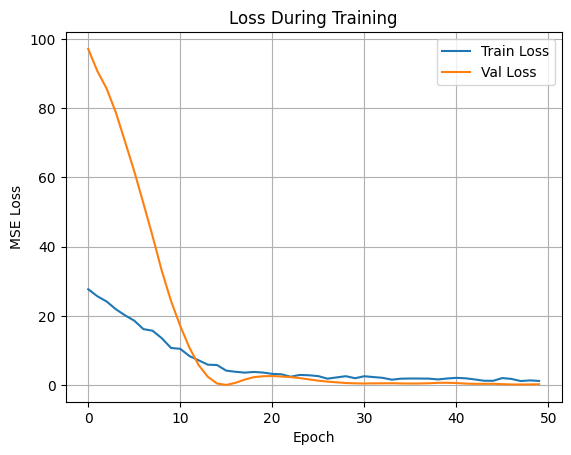

In [52]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()

## 🔍 Predict Derivative from (x, y)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


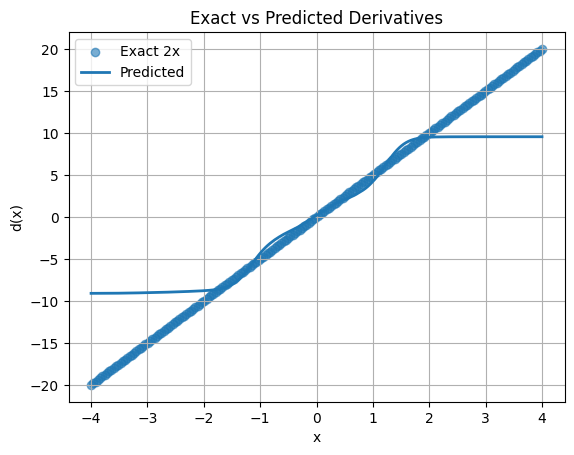

In [53]:
# 🔍 Predict derivatives for a range of points and compare with exact values
x_test = np.linspace(-4, 4, 200).astype(np.float32)
y_test = x_test ** 5
d_exact = 5 * x_test  # exact derivative for y = x^5

d_pred = model.predict(np.stack([x_test, y_test], axis=1)).flatten()

# 📊 Plot exact vs. predicted derivative
plt.scatter(x_test, d_exact, label='Exact 2x', alpha=0.6)
plt.plot(x_test, d_pred, label='Predicted', linewidth=2)
plt.title("Exact vs Predicted Derivatives")
plt.xlabel("x")
plt.ylabel("d(x)")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Summary
- Input: (x, y)
- Output: predicted derivative $\frac{dy}{dx}$
- Trainable for many functions if fed with appropriate datasets.

You can extend this by feeding tables from physical experiments, CSV files, or symbolic derivatives.